In [ ]:
pip install scikit-learn

In [ ]:
pip install yellowbrick

In [ ]:
pip install scipy

In [ ]:
pip install yellowbrick

In [ ]:
pip install sklearn

In [ ]:
pip install hazm

In [ ]:
pip install gensim

In [ ]:
pip install tqdm

In [ ]:
pip install bs4

In [ ]:
pip install selenium

In [1]:
import seaborn as sns

from yellowbrick.cluster import kelbow_visualizer, intercluster_distance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# from .preprocess import *
from phase3.clustering import return_clustered_csv, kmeans, load_data, vectorize, get_res, grid_search, GMM, hierarchical, return_clustered_csv_gmm

sns.set_theme()
sns.set_style("dark")

In [2]:
# loading data
data, major_labels, minor_labels = load_data(stem=False, lemmatize=True, remove_conjunctions=True)
tfidf, w2v = vectorize(data, w2v_options=dict(size=64, iter=128, min_count=2))
pca_tfidf = PCA(64, random_state=666).fit_transform(tfidf.toarray())

In [ ]:
get_res(return_clustered_csv(data, kmeans, pca_tfidf, w2v, options=dict(random_state=666), save=True), data=data)

In [ ]:
get_res(hier_res=return_clustered_csv(
    data,
    hierarchical,
    tfidf=pca_tfidf, w2v=w2v,
    options=dict(n_components=len(major_labels)),
    save=True), data=data)

In [5]:
variables = dict(n_components=list(range(4,16)), max_iter=[100, 250, 500], covariance_type=['spherical', 'tied', 'diag', 'full'])
fixed_vars = dict(random_state=666)
res = grid_search(GMM, data=data, tfidf=pca_tfidf, w2v=w2v, variables=variables, fixed_params=fixed_vars)

  1%|          | 1/144 [00:00<00:33,  4.23it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  1%|▏         | 2/144 [00:00<00:45,  3.15it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  2%|▏         | 3/144 [00:00<00:39,  3.57it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  3%|▎         | 5/144 [00:01<00:54,  2.55it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  4%|▍         | 6/144 [00:02<00:54,  2.53it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  5%|▍         | 7/144 [00:02<00:45,  3.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  6%|▋         | 9/144 [00:03<00:51,  2.63it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  7%|▋         | 10/144 [00:03<00:50,  2.66it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  8%|▊         | 11/144 [00:04<00:43,  3.02it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



  9%|▉         | 13/144 [00:05<00:58,  2.24it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 10%|▉         | 14/144 [00:06<01:15,  1.72it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 10%|█         | 15/144 [00:06<01:00,  2.13it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 11%|█         | 16/144 [00:07<01:10,  1.82it/s]

ERROR OCCURRED... ANS NOT UPDATED!



 12%|█▏        | 17/144 [00:07<01:02,  2.02it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 12%|█▎        | 18/144 [00:08<01:15,  1.66it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 13%|█▎        | 19/144 [00:08<01:01,  2.04it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 14%|█▍        | 20/144 [00:09<01:21,  1.53it/s]

ERROR OCCURRED... ANS NOT UPDATED!



 15%|█▍        | 21/144 [00:09<01:07,  1.82it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 15%|█▌        | 22/144 [00:10<01:22,  1.48it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 16%|█▌        | 23/144 [00:11<01:05,  1.84it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 17%|█▋        | 25/144 [00:12<01:02,  1.89it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 19%|█▉        | 27/144 [00:13<00:57,  2.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 20%|██        | 29/144 [00:14<00:53,  2.16it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 22%|██▏       | 31/144 [00:15<00:50,  2.22it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 23%|██▎       | 33/144 [00:16<00:50,  2.20it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 24%|██▎       | 34/144 [00:17<01:11,  1.55it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 24%|██▍       | 35/144 [00:17<00:57,  1.89it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 26%|██▌       | 37/144 [00:18<00:52,  2.02it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 27%|██▋       | 39/144 [00:19<00:48,  2.17it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 28%|██▊       | 41/144 [00:21<01:01,  1.66it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 29%|██▉       | 42/144 [00:22<01:06,  1.52it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 30%|██▉       | 43/144 [00:22<00:53,  1.88it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 31%|███▏      | 45/144 [00:24<01:01,  1.61it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 32%|███▏      | 46/144 [00:25<01:18,  1.25it/s]

ERROR OCCURRED... ANS NOT UPDATED!



 33%|███▎      | 47/144 [00:25<01:05,  1.48it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 33%|███▎      | 48/144 [00:28<01:59,  1.24s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 34%|███▍      | 49/144 [00:28<01:31,  1.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 35%|███▍      | 50/144 [00:30<01:43,  1.10s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 35%|███▌      | 51/144 [00:30<01:17,  1.20it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 37%|███▋      | 53/144 [00:32<01:14,  1.22it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 38%|███▊      | 54/144 [00:33<01:21,  1.11it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 38%|███▊      | 55/144 [00:33<01:02,  1.43it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 39%|███▉      | 56/144 [00:35<01:46,  1.21s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 40%|███▉      | 57/144 [00:36<01:22,  1.05it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 40%|████      | 58/144 [00:37<01:25,  1.00it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 41%|████      | 59/144 [00:37<01:05,  1.30it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 42%|████▏     | 60/144 [00:38<01:20,  1.05it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 42%|████▏     | 61/144 [00:39<01:01,  1.36it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 43%|████▎     | 62/144 [00:40<01:08,  1.19it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 44%|████▍     | 63/144 [00:40<00:56,  1.43it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 45%|████▌     | 65/144 [00:44<01:31,  1.16s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 46%|████▌     | 66/144 [00:46<01:44,  1.34s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 47%|████▋     | 67/144 [00:46<01:19,  1.03s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 48%|████▊     | 69/144 [00:49<01:19,  1.06s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 49%|████▊     | 70/144 [00:50<01:22,  1.11s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 49%|████▉     | 71/144 [00:50<01:05,  1.11it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 51%|█████     | 73/144 [00:53<01:08,  1.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 51%|█████▏    | 74/144 [00:54<01:15,  1.08s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 52%|█████▏    | 75/144 [00:54<00:58,  1.18it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 53%|█████▎    | 77/144 [00:56<00:52,  1.27it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 54%|█████▍    | 78/144 [00:57<00:55,  1.20it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 55%|█████▍    | 79/144 [00:57<00:42,  1.54it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 56%|█████▋    | 81/144 [00:59<00:45,  1.40it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 57%|█████▋    | 82/144 [01:00<00:51,  1.21it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 58%|█████▊    | 83/144 [01:00<00:39,  1.55it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 58%|█████▊    | 84/144 [01:02<00:56,  1.06it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 59%|█████▉    | 85/144 [01:02<00:42,  1.38it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 60%|█████▉    | 86/144 [01:04<00:59,  1.03s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 60%|██████    | 87/144 [01:04<00:47,  1.21it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 62%|██████▏   | 89/144 [01:06<00:47,  1.16it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 62%|██████▎   | 90/144 [01:08<00:56,  1.05s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 63%|██████▎   | 91/144 [01:08<00:43,  1.21it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 65%|██████▍   | 93/144 [01:10<00:41,  1.24it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 65%|██████▌   | 94/144 [01:11<00:46,  1.08it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 66%|██████▌   | 95/144 [01:11<00:35,  1.38it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 67%|██████▋   | 96/144 [01:13<00:53,  1.11s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 67%|██████▋   | 97/144 [01:14<00:39,  1.19it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 68%|██████▊   | 98/144 [01:15<00:44,  1.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 69%|██████▉   | 99/144 [01:15<00:33,  1.33it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 69%|██████▉   | 100/144 [01:17<00:49,  1.11s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 70%|███████   | 101/144 [01:17<00:36,  1.18it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 71%|███████   | 102/144 [01:19<00:41,  1.00it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 72%|███████▏  | 103/144 [01:19<00:32,  1.28it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 72%|███████▏  | 104/144 [01:21<00:41,  1.04s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 73%|███████▎  | 105/144 [01:21<00:31,  1.24it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 74%|███████▎  | 106/144 [01:23<00:44,  1.17s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 74%|███████▍  | 107/144 [01:23<00:33,  1.11it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 75%|███████▌  | 108/144 [01:26<00:49,  1.36s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 76%|███████▌  | 109/144 [01:26<00:38,  1.09s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 76%|███████▋  | 110/144 [01:28<00:48,  1.42s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 77%|███████▋  | 111/144 [01:29<00:36,  1.11s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 78%|███████▊  | 112/144 [01:31<00:49,  1.54s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 78%|███████▊  | 113/144 [01:31<00:35,  1.15s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 80%|███████▉  | 115/144 [01:34<00:29,  1.03s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 81%|████████  | 116/144 [01:36<00:41,  1.49s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 81%|████████▏ | 117/144 [01:37<00:31,  1.16s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 82%|████████▏ | 118/144 [01:39<00:40,  1.56s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 83%|████████▎ | 119/144 [01:40<00:31,  1.26s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 83%|████████▎ | 120/144 [01:42<00:38,  1.60s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 84%|████████▍ | 121/144 [01:42<00:27,  1.22s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 85%|████████▍ | 122/144 [01:44<00:27,  1.23s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 85%|████████▌ | 123/144 [01:44<00:20,  1.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 86%|████████▌ | 124/144 [01:46<00:25,  1.29s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 87%|████████▋ | 125/144 [01:46<00:20,  1.07s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 88%|████████▊ | 126/144 [01:48<00:23,  1.30s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 88%|████████▊ | 127/144 [01:49<00:17,  1.03s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 89%|████████▉ | 128/144 [01:51<00:24,  1.51s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 90%|████████▉ | 129/144 [01:52<00:17,  1.14s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 90%|█████████ | 130/144 [01:54<00:22,  1.59s/it]

ERROR OCCURRED... ANS NOT UPDATED!



 91%|█████████ | 131/144 [01:55<00:15,  1.23s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 92%|█████████▏| 132/144 [01:57<00:17,  1.42s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 92%|█████████▏| 133/144 [01:57<00:11,  1.07s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 93%|█████████▎| 134/144 [01:58<00:11,  1.16s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 94%|█████████▍| 135/144 [01:58<00:07,  1.14it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 94%|█████████▍| 136/144 [02:01<00:10,  1.25s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 95%|█████████▌| 137/144 [02:01<00:06,  1.05it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 96%|█████████▌| 138/144 [02:03<00:07,  1.26s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 97%|█████████▋| 139/144 [02:04<00:06,  1.33s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 97%|█████████▋| 140/144 [02:07<00:06,  1.65s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 98%|█████████▊| 141/144 [02:07<00:03,  1.23s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 99%|█████████▊| 142/144 [02:08<00:02,  1.28s/it]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



 99%|█████████▉| 143/144 [02:09<00:00,  1.03it/s]

ERROR OCCURRED... ANS NOT UPDATED!

ERROR OCCURRED... ANS NOT UPDATED!



100%|██████████| 144/144 [02:10<00:00,  1.10it/s]

ERROR OCCURRED... ANS NOT UPDATED!



ValueError: s must be a scalar, or the same size as x and y

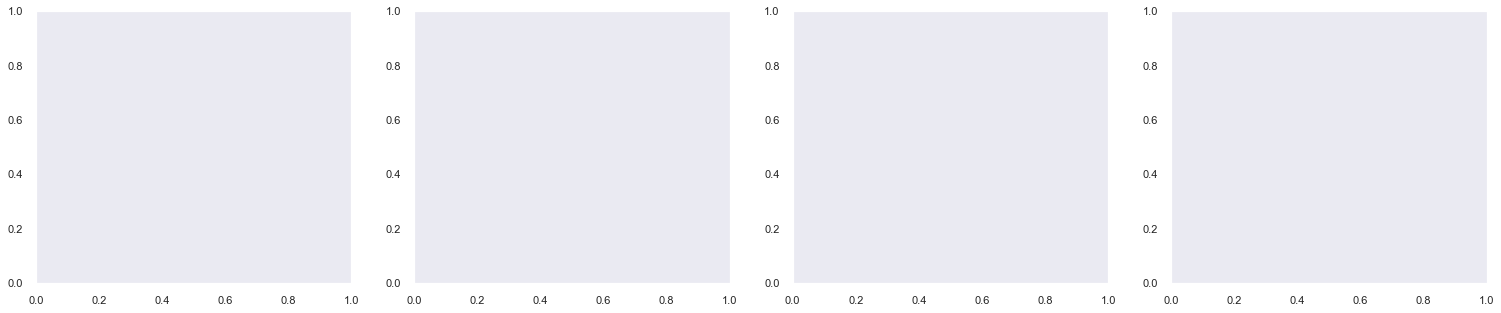

In [3]:
get_res(gmm_res=return_clustered_csv_gmm(
    data, 
    GMM, 
    tfidf=pca_tfidf, w2v=w2v, 
    options=dict(n_components=len(major_labels), random_state=666), 
    options_tfidf=dict(covariance_type='full', max_iter=600),
    options_w2v=dict(covariance_type='full', max_iter=600),
    save=True), data=data)